# Inertia tensor | Carbon monoxide

[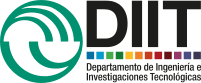](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

In [1]:
import sympy as sm # import functions for symbolic manipulations
import sympy.physics.mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
O_m, C_m, d = sm.symbols('m_O, m_C, d', positive=True)

First, we write the positions in a frame of reference centered at the O atom.

In [3]:
# Cartesian frame of reference
e = sm.physics.vector.ReferenceFrame('e')

# positions
O_r = 0* (e.x + e.y + e.z) # origin
C_r = d* (e.x)

## Inertia tensor for a system of point masses

Only the nuclei at the ends of the bonds considered as point masses will be contemplated.
Therefore, the expression for the moment of inertia tensor for discrete mass distributions is used.

$$
\overline{\overline{I}}
= I_{ik} = 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
$$

$$
=
\begin{pmatrix}
\sum_p m_p (y_p^2 + z_p^2) & - \sum_p m_p x_p y_p & - \sum_p m_p x_p z_p \\
- \sum_p m_p y_p x_p & \sum_p m_p (x_p^2 + z_p^2)  & - \sum_p m_p y_p z_p \\
- \sum_p m_p z_p x_p & - \sum_p m_p z_p y_p & \sum_p m_p (x_p^2 + y_p^2) \\
\end{pmatrix}
$$

The moments of inertia, at the diagonal.

In [4]:
Ixx = (
       O_m* (O_r.dot(e.y)**2 + O_r.dot(e.z)**2) +
       C_m* (C_r.dot(e.y)**2 + C_r.dot(e.z)**2)
      ).simplify()
Iyy = (
       O_m* (O_r.dot(e.x)**2 + O_r.dot(e.z)**2) +
       C_m* (C_r.dot(e.x)**2 + C_r.dot(e.z)**2)
      ).simplify()
Izz = (
       O_m* (O_r.dot(e.x)**2 + O_r.dot(e.y)**2) +
       C_m* (C_r.dot(e.x)**2 + C_r.dot(e.y)**2)
      ).simplify()

The products of inertia are null, but we calculate them for verification.

In [5]:
Ixy = (
      O_m* (O_r.dot(e.x)* O_r.dot(e.y) ) +
      C_m* (C_r.dot(e.x)* C_r.dot(e.y) )
      ).simplify()
Iyx = Ixy
Ixz = (
      O_m* (O_r.dot(e.x)* O_r.dot(e.z) ) +
      C_m* (C_r.dot(e.x)* C_r.dot(e.z) )
      ).simplify()
Izx = Ixz
Iyz = (
      O_m* (O_r.dot(e.y)* O_r.dot(e.z) ) +
      C_m* (C_r.dot(e.y)* C_r.dot(e.z) )
      ).simplify()
Izy = Iyz

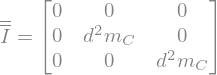

In [6]:
I_ik = sm.Eq(
  sm.Symbol(r'\overline{\overline{I}}'),
  sm.Matrix(
    [
      [Ixx, Ixy, Ixz],
      [Ixy, Iyy, Iyz],
      [Izx, Izy, Izz]
    ]
  ),
  evaluate=False
)
I_ik

## Inertia tensor for rotations about the center of mass, applying the Parallel-axis theorem

Since the moments of inertia are requested, the frame of reference must be oriented with the symmetry axes of the molecule and must be calculated from its center of mass. This is located at some point on the $\hat{y}$ axis shown in the figure.

If the calculation is performed using a frame of reference $x'_i$ with the origin not at the center of mass, we can calculate a tensor $I'_{ik}$ and then recover the calculation from the center of mass $I_{ik}$

$$
I_{ik} = I'_{ik} - M [ a^2 \delta_{ik} - a_i a_k ]
$$
where $M$ is the total mass of the system and $\vec{a}$ is a vector directed from the origin to the center of mass.

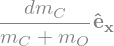

In [7]:
mass = O_m + C_m
cm_r = (C_m* C_r)/ mass
cm_r

This is used with the parallel-axis theorem

$$
M [ a^2 \delta_{ik} - a_i a_k ]
=
\begin{pmatrix}
M (a_y^2 + a_z^2) & - M a_x a_y & - M a_x a_z \\
- M a_y a_x & M (a_x^2 + a_z^2) & - M a_y a_z \\
- M a_z a_x & - M a_z a_y & M (a_x^2 + a_y^2),
\end{pmatrix}
$$

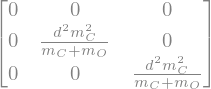

In [8]:
a_x = cm_r.dot(e.x)
a_z = cm_r.dot(e.z)
a_y = cm_r.dot(e.y)
steiner_M = mass* sm.Matrix(
  [
    [(a_y**2 + a_z*2) , - a_x* a_y, - a_x* a_z],
    [- a_y* a_x, (a_x**2 + a_z**2), - a_y* a_z],
    [- a_z* a_x, - a_z* a_y, (a_x**2 + a_y**2)]
  ]
  )
steiner_M

And then we get the inertia tensor calculated from the center of mass.

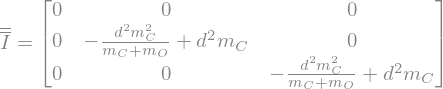

In [9]:
Iik_cm = sm.Eq(
  I_ik.lhs,
  I_ik.rhs - steiner_M,
  evaluate=False
) 
Iik_cm

It's always convenient to simplify the elements in the tensor.

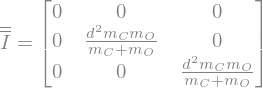

In [10]:
Iik_cm = sm.Eq(
  Iik_cm.lhs,
  Iik_cm.rhs.applyfunc(sm.simplify),
  evaluate=False
)
Iik_cm

Let's susbtitute the values to get the moments of inertia in units $\mathrm{kg\,m^2}$.

In [11]:
# geometry CO
# https://cccbdb.nist.gov/exp2x.asp
d_magnitude = 1.1282 # [angstrom]
d_magnitude *= 1E-10 # [m]

# masses
constantAvogadro = 6.02214076E23 # [mol^-1]
O_m_magnitude = 15.999 # [u]
O_m_magnitude *= 1E-3/ constantAvogadro # [kg]
C_m_magnitude = 12 # [u]
C_m_magnitude *= 1E-3/ constantAvogadro # [kg]

parameters = {
    O_m : O_m_magnitude,
    C_m : C_m_magnitude,
    d : d_magnitude,
}

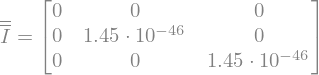

In [12]:
Iik_cm = sm.Eq(
  Iik_cm.lhs,
  Iik_cm.rhs.subs(parameters).evalf(n=3),
  evaluate=False
) # three significant figures
Iik_cm

In [13]:
from sympy.physics.vector import vlatex

In [14]:
print(
  vlatex(
    Iik_cm
    )
  )

\overline{\overline{I}} = \left[\begin{matrix}0 & 0 & 0\\0 & 1.45 \cdot 10^{-46} & 0\\0 & 0 & 1.45 \cdot 10^{-46}\end{matrix}\right]


## Rotating the inertia tensor

For this, the moment of inertia tensor is diagonalized by calculating its eigenvectors, $\vec{v}_i$ and generating with these the rotation matrix, Q as
$$
Q =
\begin{bmatrix}
| & | & | \\
\vec{v}_{1} & \vec{v}_{2} & \vec{v}_{3} \\
| & | & |
\end{bmatrix}
.
$$
The rotated tensor is obtained as
$$
\overline{\overline{\Lambda}} = Q^{-1} \overline{\overline{I}} Q
,
$$
where $\Lambda$ is a diagonal matrix with the eigenvalues of the original moment of inertia tensor, $\overline{\overline{I}}$.
It is customary to align the axis system so that the largest moment of inertia is the principal moment of inertia $I_{zz}$, and then $I_{yy}$.
This ensures that regardless of what axis orientation was chosen for the reference system, the rotated moment of inertia tensor will be the same.

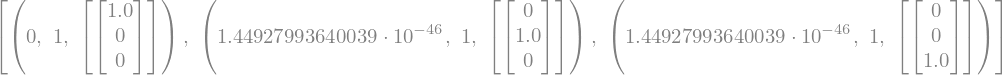

In [15]:
eigenvectors = Iik_cm.rhs.eigenvects()
eigenvectors

In Q the eigenvectors are ordered according to the respective smallest eigenvalue $\lambda_i$ so that the largest moment of inertia appears in the last row and column, that is, it becomes $I_{zz}$.
In this case nothing would need to be done, but the code that performs this will be applied so it can be used when necessary.

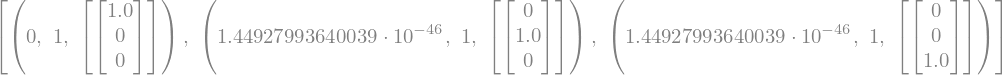

In [16]:
eigenvectors = sorted(eigenvectors, key=lambda x: x[0]) # orders in ascending order
eigenvectors

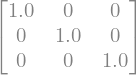

In [17]:
Q = sm.Matrix.hstack(*[eigenvectors[i][2][0] for i in range(3)]) # eigenvectors as columns
Q

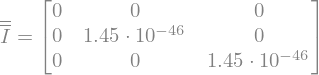

In [18]:
lambda_tensor = sm.Eq(
  Iik_cm.lhs,
  (Q.inv()* Iik_cm.rhs* Q).evalf(n=3),
  evaluate=False
)
lambda_tensor

In [19]:
print(
  vlatex(
    lambda_tensor
    )
  )

\overline{\overline{I}} = \left[\begin{matrix}0 & 0 & 0\\0 & 1.45 \cdot 10^{-46} & 0\\0 & 0 & 1.45 \cdot 10^{-46}\end{matrix}\right]
